Statistics assingment

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import math as m
from statsmodels.stats.weightstats import ztest
import scipy.stats as stats
from scipy.stats import chi2
from scipy.stats import norm

In [3]:
""" 1. Generate a list o> 100 integers containing values between 90 to 130 and store it in the variable `int_list`. 
After generating the list, find the following"""

int_list = np.random.randint(90,130,100)
weights = np.random.rand(100)

# (i) Mean
def calculate_mean(numbers):
    return np.mean(numbers)

print("Mean:", calculate_mean(int_list))

# (i) Median
def calculate_median(numbers):
    return np.median(numbers)

print("Median:", calculate_median(int_list))

# (ii) Mode
def calculate_mode(numbers):
    mode_result = st.mode(numbers)
    return mode_result

print("Mode:", calculate_mode(int_list))

# (iii) Weighted Mean
def calculate_weighted_mean(values, weights):
    return np.average(values, weights=weights)

print("Weighted Mean:", calculate_weighted_mean(int_list, weights))

# (iv) Geometric Mean
def calculate_geometric_mean(numbers):
    return stats.gmean(numbers)

print("Geometric Mean:", calculate_geometric_mean(int_list))

# (v) Harmonic Mean
def calculate_harmonic_mean(numbers):
    return stats.hmean(numbers)

print("Harmonic Mean:", calculate_harmonic_mean(int_list))

# (vi) Midrange
def calculate_midrange(numbers):
    return (np.min(numbers) + np.max(numbers)) / 2

print("Midrange:", calculate_midrange(int_list))

# (vii) Trimmed Mean
def calculate_trimmed_mean(numbers, proportion_to_cut):
    return stats.trim_mean(numbers, proportion_to_cut)

print("Trimmed Mean (10%):", calculate_trimmed_mean(int_list, 0.1))


Mean: 110.17
Median: 112.0
Mode: 127
Weighted Mean: 110.1628459885572
Geometric Mean: 109.48925323642243
Harmonic Mean: 108.7998108630377
Midrange: 109.5
Trimmed Mean (10%): 110.4375


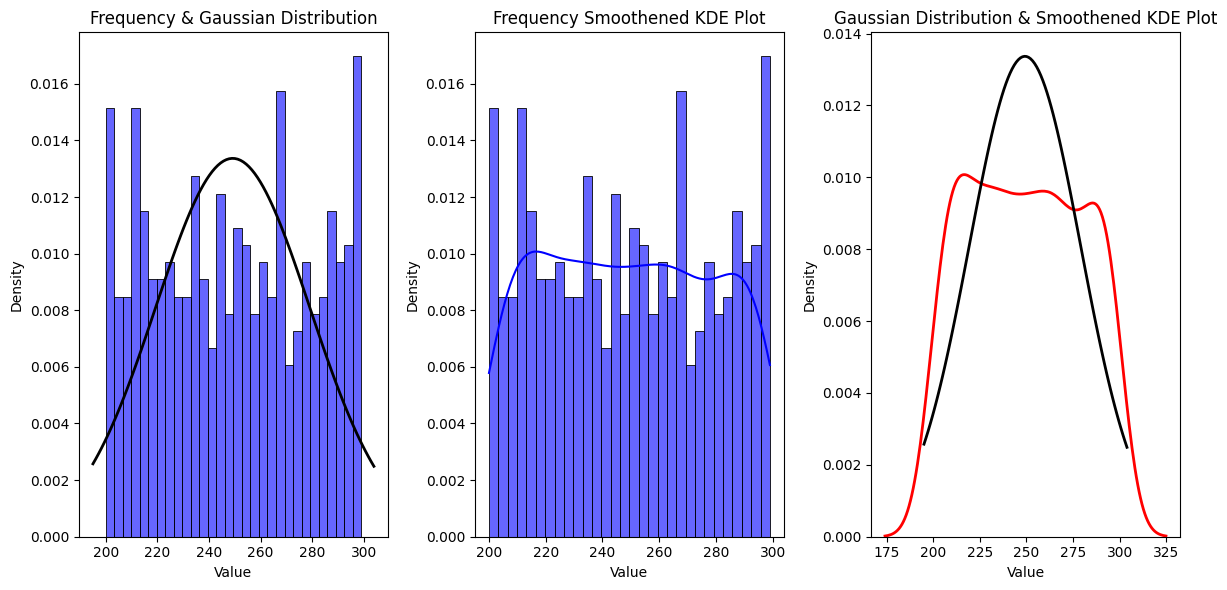

In [12]:
"""2. Generate a list o> 500 integers containing values between 200 to 300 and store it in the variable `int_list2`. 
After generating the list, find the following"""

int_list2 = np.random.randint(200,300,500)

mean = np.mean(int_list2)
std_dev = np.std(int_list2)

# Frequency & Gaussian Distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(int_list2, kde=False, stat="density", bins=30, color='blue', alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Frequency & Gaussian Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

# Frequency smoothened KDE plot
plt.subplot(1, 3, 2)
sns.histplot(int_list2, kde=True, stat="density", bins=30, color='blue', alpha=0.6)
plt.title('Frequency Smoothened KDE Plot')
plt.xlabel('Value')
plt.ylabel('Density')

# Gaussian distribution & smoothened KDE plot
plt.subplot(1, 3, 3)
sns.kdeplot(int_list2, color='red', linewidth=2)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Gaussian Distribution & Smoothened KDE Plot')
plt.xlabel('Value')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [11]:
# calculate the range
def calculate_range(data):
    return max(data) - min(data)

print("the range is:",calculate_range(int_list2))

# the variance and standard deviation 
var = np.var(int_list2)
std = np.std(int_list2)
print(f"the variance value is: {var}\n the standard deviation :",std)

# the interquartile range
def compute_iqr(data):
    data_sorted = np.sort(data)
    q1 = np.percentile(data_sorted, 25)
    q3 = np.percentile(data_sorted, 75)

    iqr = q3 - q1
    return iqr

print("the interquartile range is :",compute_iqr(int_list2))

#the coefficient of variation
def calculate_cv(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    
    cv = (std_dev / mean) * 100
    return cv

print("the coefficient of variation is :",calculate_cv(int_list2))

# the mean absolute deviation
def calculate_mad(data):
    mean = np.mean(data)
    abs_deviations = [abs(x - mean) for x in data]
    mad = np.mean(abs_deviations)
    return mad

print(" the mean absolute deviation value is :",calculate_mad(int_list2))

#the quartile deviation
def calculate_quartile_deviation(data):
    data_sorted = np.sort(data)
    q1 = np.percentile(data_sorted, 25)
    q3 = np.percentile(data_sorted, 75)
    
    iqr = q3 - q1
    
    quartile_deviation = iqr / 2
    
    return quartile_deviation

print("the quartile deviation value is :",calculate_quartile_deviation(int_list2))

# the range-based coefficient of dispersion 
def range_based_coefficient_of_dispersion(data):
    mean = np.mean(data)
    data_range = np.max(data) - np.min(data)
    
    coefficient_of_dispersion = (data_range / mean) * 100
    
    return coefficient_of_dispersion

print("the range-based coefficient of dispersion value is :",range_based_coefficient_of_dispersion(int_list2))

the range is: 99
the variance value is: 796.964396
 the standard deviation : 28.230557840751217
the interquartile range is : 48.0
the coefficient of variation is : 11.229249505076021
 the mean absolute deviation value is : 24.107608
the quartile deviation value is : 24.0
the range-based coefficient of dispersion value is : 39.379161661402854


In [23]:
#3)  Write a Python class representing a discrete random variable with methods to calculate its expected value and variance.

values = [10, 20, 30, 40]
probabilities = [0.1, 0.2, 0.3, 0.4]

class DiscreteRandomVariable:
    def __init__(self, values, probabilities):
        
        #condition check
         if len(values) != len(probabilities):
            raise ValueError("The length of values and probabilities must be the same.")
         if not np.isclose(np.sum(probabilities), 1):
            raise ValueError("The sum of probabilities must be 1.")
         if any(p < 0 for p in probabilities):
            raise ValueError("Probabilities cannot be negative.")
        
         self.values = np.array(values)
         self.probabilities = np.array(probabilities)
    
    def expected_value(self):
        return np.sum(self.values * self.probabilities)
    
    def variance(self):
        mean = self.expected_value()
        expected_value_squared = np.sum((self.values ** 2) * self.probabilities)
        return expected_value_squared - mean ** 2
    
random_variable = DiscreteRandomVariable(values, probabilities)

print(f"Expected Value: {random_variable.expected_value()}\n Variance:", random_variable.variance())

Expected Value: 30.0
 Variance: 100.0


In [55]:
#4) Implement a program to simulate the rolling of a fair six-sided die and calculate the expected value and variance of the outcomes.

class FairSixSidedDie:
    def __init__(self):
        self.sides = [1, 2, 3, 4, 5, 6]
        self.probabilities = [1/6] * 6  

    def roll(self, num_rolls):
        return np.random.choice(self.sides, size=num_rolls, p=self.probabilities)

    def expected_value(self):
       return np.mean(self.sides)

    def variance(self):
        mean = self.expected_value()
        expected_value_squared = np.mean([x ** 2 for x in self.sides])
        return expected_value_squared - mean ** 2

if __name__ == "__main__":
    die = FairSixSidedDie()
    num_rolls = 10000 
    outcomes = die.roll(num_rolls)
    
    print("Theoretical Expected Value of Die Outcomes:", die.expected_value())
    print("Theoretical Variance of Die Outcomes:", die.variance())
    print("Empirical Expected Value from Simulation:", np.mean(outcomes))
    print("Empirical Variance from Simulation:", np.var(outcomes))


Theoretical Expected Value of Die Outcomes: 3.5
Theoretical Variance of Die Outcomes: 2.916666666666666
Empirical Expected Value from Simulation: 3.5321
Empirical Variance from Simulation: 2.9365695899999995


In [73]:
"""5) Create a Python function to generate random samples from a given probability distribution (e.g., 
binomial, Poisson) and calculate their mean and variance."""


def gscs(distribution, params, num_samples):
    if distribution == 'binomial':
        n = params.get('n')
        p = params.get('p')
        samples = np.random.binomial(n, p, num_samples)
        
    elif distribution == 'poisson':
        lam = params.get('lam')
        samples = np.random.poisson(lam, num_samples)
        
    else:
        raise ValueError("Unsupported distribution. Supported distributions are 'binomial' and 'poisson'.")

    # Calculate empirical mean and variance
    empirical_mean = np.mean(samples)
    empirical_variance = np.var(samples)
    
    return samples, empirical_mean, empirical_variance


num_samples = 1000 

# Binomial distribution example
binomial_params = {'n': 10, 'p': 0.5} 
samples_binomial, empirical_mean_binomial, empirical_variance_binomial = gscs('binomial', binomial_params, num_samples)
print("Binomial Distribution:")
print("Empirical Mean:", empirical_mean_binomial)
print("Empirical Variance:", empirical_variance_binomial)

# Poisson distribution example
poisson_params = {'lam': 3}
samples_poisson, empirical_mean_poisson, empirical_variance_poisson = gscs('poisson', poisson_params, num_samples)
print("Poisson Distribution:")
print("Empirical Mean:", empirical_mean_poisson)
print("Empirical Variance:", empirical_variance_poisson)

Binomial Distribution:
Empirical Mean: 5.123
Empirical Variance: 2.637871
Poisson Distribution:
Empirical Mean: 3.044
Empirical Variance: 3.2600640000000003
